# Problem 2: NVIDIA Jetson Optimized Convolution

We now wish to explore convolution methods optimized for the NVIDIA Jetson chip.  To do this, we utilize the library [OpenCV](https://opencv.org/), which is a library primarily aimed at real-time computer vision.  OpenCV is capable of running on CPUs and GPUs and can be installed on the NVIDIA Jetson.  In this notebook, the CPU function filter2D is tested for its performance and compared to the methods used in Problem 1.

In [80]:
import time
import scipy.signal
import numpy as np
import sys
import cv2 as cv

import matplotlib.pyplot as plt

In [81]:
N = 201
#N = 11

u_init = np.zeros([N, N], dtype=np.float32)
ut_init = np.zeros([N, N], dtype=np.float32)

# initial condition
u_init[N//2,N//2] = 10

In [82]:
LaPlace = np.array([[0., 1., 0.],
                    [1., -4., 1.],
                    [0., 1., 0.]])

In [83]:
U_ = u_init
Ut_ = ut_init
lU_= np.zeros_like(ut_init)
cv_times = []
start_time_loop = time.time()
for k in range(0,50):
    lU_ = cv.filter2D(U_, -1, LaPlace)
    U_  = U_+ Ut_
    Ut_ = Ut_ + (1./4.*lU_)
    cv_times.append(time.time() - start_time_loop)
print("OpenCV (avg): "+str(sum(cv_times)/len(cv_times)*1000)+" [ms]")


OpenCV (avg): 11.490273475646973 [ms]


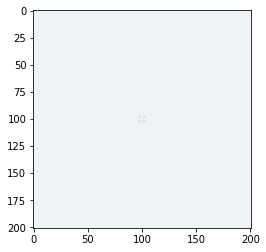

In [84]:
plt.imshow(U_,cmap='RdBu')

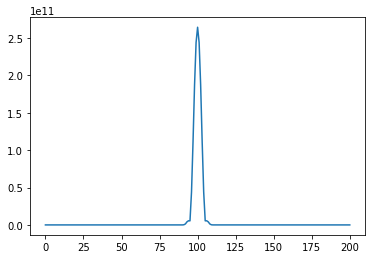

In [85]:
plt.plot(np.abs(U_[:,N//2]))

In [86]:
N = [21,51,101,151,201]
t_cv = [1.6823291778564453, 2.827620506286621, 4.4998979568481445, 7.379860877990723, 11.490273475646973]

## Comments

The OpenCV function filter2D, outperforms both the loop-based and vectorized methods from Problem 1.  This method, however, is not really an optimized method for the NVIDIA Jetson.  OpenCV is available to all computer architectures and this code is only utilizing the CPU functions.  To truly optimize this code for the Jetson, OpenCV's GPU function should be used.  This will be attempted in a C++ implementation as the functions are better worked with in a C++ environment.  